### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第23天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/03/24
### 改版日期:  
### 改版備註:

# 作業 : (Kaggle)鐵達尼生存預測 
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察降低偏態的影響

# [作業重點]
- 觀察使用log1p降偏態時, 對於分布與迴歸分數的影響 (In[6], Out[6])
- 修正區塊中的資料問題後, 觀察以box-cox降偏態, 對於分布與迴歸分數的影響 (In[7], Out[7])

In [4]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(0)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


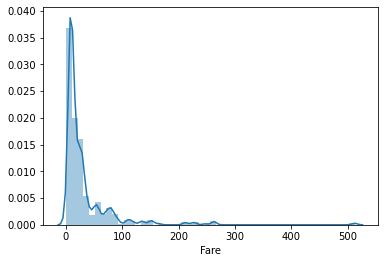

In [6]:
# 顯示 Fare 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Fare'][:train_num])
plt.show()

In [7]:
# 計算基礎分數
df_mm = MMEncoder.fit_transform(df)
train_X = df_mm[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7015378821166279

### ANS

# 作業1 
* 試著在鐵達尼的票價 (Fare) 欄位中使用對數去偏 (log1p) , 結果是否更好?

'修改前'
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64
False
'修改後'
0    2.110213
1    4.280593
2    2.188856
3    3.990834
4    2.202765
Name: Fare, dtype: float64


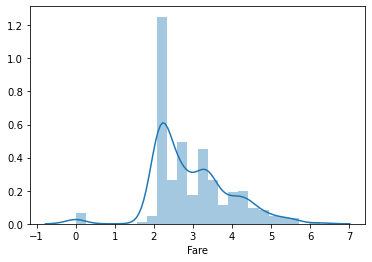

0.710545477371163

In [8]:
# 將 Fare 取 log1p 後, 看散佈圖, 並計算分數
import pprint
df_fixed = copy.deepcopy(df)
"""
transform df_fixed['Fare'] with log1p
"""
col_name = 'Fare'
'修改前'
pprint.pprint('修改前')
pprint.pprint(df_fixed[col_name].head())
'檢查是否資料有0值'
pprint.pprint(df_fixed[df_fixed[col_name]==0][col_name].any())
'取log1p'
df_fixed[col_name] = np.log1p(df_fixed[col_name])
'修改後'
pprint.pprint('修改後')
pprint.pprint(df_fixed[col_name].head())



sns.distplot(df_fixed['Fare'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

### 使用對數去偏 (log1p) , 結果是更好的

# 作業2
* 最後的 boxcox 區塊直接執行會造成錯誤, 起因為輸入值有負值, 請問如何修正後可以使用 boxcox? (Hint : 試圖修正資料)

'Fare < 0 '
0
'Fare = 0 '
18


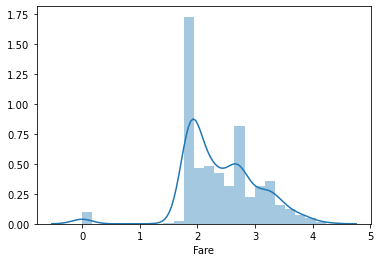

0.7094218818655451

In [10]:
# 將 Fare 取 boxcox 後, 看散佈圖, 並計算分數 (執行會有 error, 請試圖修正)
# 參考網址
# https://stackoverflow.com/questions/50180988/valueerror-data-must-be-positive-boxcox-scipy
from scipy import stats
df_fixed = copy.deepcopy(df)
"""
fix the error
ValueError: Data must be positive.
"""
col_name = 'Fare'
# 檢查是否資料小於等於0值
pprint.pprint('{0} < 0 '.format(col_name))
pprint.pprint(df_fixed[df_fixed[col_name]<0][col_name].count())
pprint.pprint('{0} = 0 '.format(col_name))
pprint.pprint(df_fixed[df_fixed[col_name]==0][col_name].count())

#加1
df_fixed[col_name] = df_fixed[col_name]+1

df_fixed[col_name] = stats.boxcox(df_fixed[col_name])[0]
sns.distplot(df_fixed[col_name][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

'Fare < 0 '
0
'Fare = 0 '
18


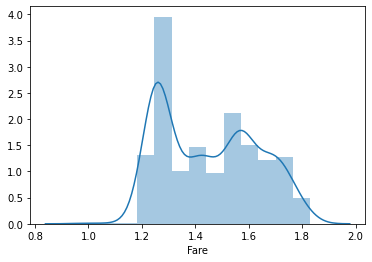

0.6105454773711632

In [11]:
# 將 Fare 取 boxcox 後, 看散佈圖, 並計算分數 (執行會有 error, 請試圖修正)
# 參考網址
# https://stackoverflow.com/questions/50180988/valueerror-data-must-be-positive-boxcox-scipy
from scipy import stats
df_fixed = copy.deepcopy(df)
"""
fix the error
ValueError: Data must be positive.
"""
col_name = 'Fare'
# 檢查是否資料小於等於0值
pprint.pprint('{0} < 0 '.format(col_name))
pprint.pprint(df_fixed[df_fixed[col_name]<0][col_name].count())
pprint.pprint('{0} = 0 '.format(col_name))
pprint.pprint(df_fixed[df_fixed[col_name]==0][col_name].count())

#只複製正數部份
df_fixed = df_fixed[df_fixed[col_name]>0]

df_fixed[col_name] = stats.boxcox(df_fixed[col_name])[0]
sns.distplot(df_fixed[col_name][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

#### 如同 log1p : 取log前需要加1, 以避免 0 取 log 時無意義的情形
#### boxcox 也需要先加 1 , 再進行計算即可